In [33]:
!pip install watermark

In [34]:
%load_ext watermark
%watermark -a 'Rakesh Varma' -v -p torch

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Rakesh Varma

Python implementation: CPython
Python version       : 3.11.12
IPython version      : 7.34.0

torch: 2.6.0+cu124



### import The Libraries

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,random_split
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

In [3]:
RANDOM_SEED=42
BATCH_SIZE=128
NUM_EPOCH=10
LEARNING_RATE=0.01
DEVICE=torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
DEVICE

device(type='cuda')

In [5]:
##DATASET & LOADER
transform = transforms.ToTensor()
dataset = datasets.MNIST(root='data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='data', train=False, transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 489kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.48MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.41MB/s]


In [6]:
train_dataset,val_dataset=random_split(dataset,[54000,6000])
train_loader=DataLoader(train_dataset,batch_size=BATCH_SIZE,shuffle=True)
val_loader=DataLoader(val_dataset,batch_size=BATCH_SIZE)
test_loader=DataLoader(test_dataset,batch_size=BATCH_SIZE)

### MLP MODEL

In [12]:
class MLP(nn.Module):
  def __init__(self,input_dim=784,hidden1=128,hidden2=64,output_dim=10):
    super().__init__()
    self.fc1=nn.Linear(input_dim,hidden1)
    self.fc2=nn.Linear(hidden1,hidden2)
    self.out=nn.Linear(hidden2,output_dim)

  def forward(self,x):
      x=x.view(-1,28*28) #Flatten the image
      x=F.relu(self.fc1(x))
      x=F.relu(self.fc2(x))
      x=self.out(x)
      return x

###Traning Function

In [17]:
def train(model,loader,optimizer,criterion):
  model.train()
  running_loss,correct,total=0.0,0,0
  for imgs,labels in loader:
    imgs,labels=imgs.to(DEVICE),labels.to(DEVICE)

    outputs=model(imgs)
    loss=criterion(outputs,labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    running_loss +=loss.item()
    _,predicted=torch.max(outputs,1)
    correct+=(predicted== labels).sum().item()
    total+=labels.size(0)


  return running_loss/len(loader),correct/total*100

### Evaluation Function

In [26]:
def evaluate(model,loader):
    model.eval()
    correct,total=0,0

    with torch.no_grad():
      for imgs,labels in loader:
        imgs,labels=imgs.to(DEVICE),labels.to(DEVICE)
        outputs=model(imgs)
        loss=criterion(outputs,labels)
        _,predicted=torch.max(outputs,1)
        correct+=(predicted==labels).sum().item()
        total+= labels.size(0)

      return correct/total*100

###INIT & TRAIN

In [27]:
model=MLP().to(DEVICE)
optimizer=torch.optim.SGD(model.parameters(),lr=LEARNING_RATE)
criterion=nn.CrossEntropyLoss()
NUM_EPOCHS=10 #MAKE SURE this line is executed
train_acc_list=[]
val_acc_list=[]

for epoch in range(NUM_EPOCHS):
   train_loss,tarin_acc=train(model,train_loader,optimizer,criterion)
   val_acc=evaluate(model,val_loader)
   train_acc_list.append(train_acc)
   val_acc_list.append(val_acc)
   print(f"Epoch {epoch+1} | Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}% | Val Acc: {val_acc:.2f}%")


Epoch 1 | Loss: 2.2025 | Train Acc: 38.06% | Val Acc: 52.18%
Epoch 2 | Loss: 1.4732 | Train Acc: 38.06% | Val Acc: 80.48%
Epoch 3 | Loss: 0.7167 | Train Acc: 38.06% | Val Acc: 86.27%
Epoch 4 | Loss: 0.5076 | Train Acc: 38.06% | Val Acc: 88.12%
Epoch 5 | Loss: 0.4319 | Train Acc: 38.06% | Val Acc: 89.25%
Epoch 6 | Loss: 0.3921 | Train Acc: 38.06% | Val Acc: 89.92%
Epoch 7 | Loss: 0.3666 | Train Acc: 38.06% | Val Acc: 90.43%
Epoch 8 | Loss: 0.3478 | Train Acc: 38.06% | Val Acc: 90.85%
Epoch 9 | Loss: 0.3329 | Train Acc: 38.06% | Val Acc: 91.25%
Epoch 10 | Loss: 0.3203 | Train Acc: 38.06% | Val Acc: 91.57%


###FINAL TEST ACCURACY

In [28]:
test_acc=evaluate(model,test_loader)
print(f"Test Accuracy: {test_acc:.2f}%")

Test Accuracy: 91.28%


###PLOT ACCURACY

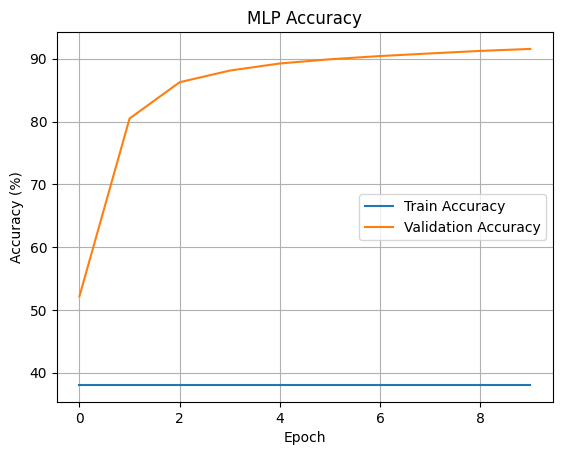

In [29]:
plt.plot(train_acc_list, label='Train Accuracy')
plt.plot(val_acc_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)
plt.title('MLP Accuracy')
plt.show()